<a href="https://colab.research.google.com/github/ashutosh-mtx/MachineLearning/blob/main/ML_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning Assignment 1
#### From: Ashutosh, Date: 17-May-2021

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


#print(cancer.DESCR) # Print the data set description

The object returned by load_breast_cancer() is a scikit-learn Bunch object, which is similar to a dictionary.


In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

This function should return an integer.


In [3]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

30

In [4]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame.

Convert the sklearn.dataset cancer to a DataFrame.

*This function should return a (569, 31) DataFrame with *

*columns = *

['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']

*and index = *

RangeIndex(start=0, stop=569, step=1)

In [5]:
def answer_one():
    
    columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']
    
    '''
    print("features:", cancer.feature_names)
    print(len(cancer.feature_names))
    print("cols:", columns)
    print(len(columns))
    '''
    index = range(0,569)
    df = pd.DataFrame(data=cancer['data'], index=index, columns = columns[:30])
    df['target'] = cancer.target
    return df


answer_one()

mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]

### Question 2

What is the class distribution? (i.e. how many instances of malignant (encoded 0) and how many benign (encoded 1)?)

This function should return a Series named target of length 2 with integer values and index = ['malignant', 'benign']


In [6]:
def answer_two():
    cancerdf = answer_one()
    
    #print(cancerdf['target'])
    # Your code here
    ret = len(cancerdf)
    target = cancerdf['target'].value_counts()

    target.rename({1: 'malignant', 0: 'benign'}, inplace=True)
    
    return target# Return your answer


answer_two()

malignant    357
benign       212
Name: target, dtype: int64

### Question 3

Split the DataFrame into X (the data) and y (the labels).

This function should return a tuple of length 2: (X, y), where

    X, a pandas DataFrame, has shape (569, 30)
    y, a pandas Series, has shape (569,).



In [7]:
def answer_three():
    cancerdf = answer_one()
    
    
    #print(type(cancerdf.columns))
    #cancerdf.columns.drop('target')
    #print(type(cancerdf))
    #print(cancerdf['target'])
    #new_df = cancerdf.loc[:, ~cancerdf.columns.isin(['target'])]
    #cancerdf.drop(columns='target', axis='columns', inplace=True)
    # find the index no
    #index_no = cancerdf.columns.get_loc('target')
    #print("Index of target: ", index_no)
    # Your code here
    #X = cancerdf.values() python help says to use to_numpy instead of values
    #X = cancerdf.to_numpy()
    #X = cancerdf.iloc[:,0:-1]
    #X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    cancerdf.drop(['target'], axis = 1, inplace=True)
    X = cancerdf.to_numpy()
    #print(len(y))
    #print(X.shape)
    #print(y.shape)
    return X, y

ret_data = answer_three()

print("Shape of tuple items: ", [item.shape for item in ret_data])
#ret_data

Shape of tuple items:  [(569, 30), (569,)]


### Question 4

Using train_test_split, split X and y into training and test sets (X_train, X_test, y_train, and y_test).

Set the random number generator state to 0 using random_state=0 to make sure your results match the autograder!

This function should return a tuple of length 4: (X_train, X_test, y_train, y_test), where

    X_train has shape (426, 30)
    X_test has shape (143, 30)
    y_train has shape (426,)
    y_test has shape (143,)



In [8]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()

    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X_train, X_test, y_train, y_test

ret_data = answer_four()

print("Shape of tuple items: ", [item.shape for item in ret_data])

Shape of tuple items:  [(426, 30), (143, 30), (426,), (143,)]


### Question 5

Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor (n_neighbors = 1).

*This function should return a * sklearn.neighbors.classification.KNeighborsClassifier.


In [9]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    # Your code here
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    return knn
    # Return your answer

print(type(answer_five()))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


### Question 6

Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use cancerdf.mean()[:-1].values.reshape(1, -1) which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

This function should return a numpy array either array([ 0.]) or array([ 1.])


In [10]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    # Your code here
    knn = answer_five()
    
    return knn.predict(means)# Return your answer

answer_six()

array([1])

### Question 7

Using your knn classifier, predict the class labels for the test set X_test.

This function should return a numpy array with shape (143,) and values either 0.0 or 1.0.


In [11]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    return knn.predict(X_test)# Return your answer

test_predict = answer_seven()
print(test_predict.shape)
test_predict

(143,)


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Question 8

Find the score (mean accuracy) of your knn classifier using X_test and y_test.

This function should return a float between 0 and 1


In [12]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    score = knn.score(X_test, y_test)
    return score# Return your answer

print("Mean Accuracy for X_test and y_test is ", answer_eight())

Mean Accuracy for X_test and y_test is  0.916083916083916


### Optional plot

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.


In [15]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

Uncomment the plotting function to see the visualization.

Comment out the plotting function when submitting your notebook for grading.


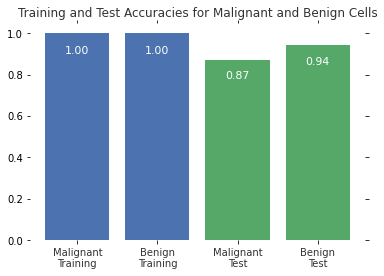

In [16]:
accuracy_plot()